# Code for generating figure v_comparison in paper.

This figure shows a comparison between velocities calculated with RVs and velocities inferred without RVs.

Steps needed to generate data files:

1. Run aviary/code/data.py to select the sample of McQuillan et al. (2014) stars and calculate redenning, temperatures, etc. The output is aviary/data/gaia_mc5.csv.

2. Run aviary/code/calculate_vxyz.py to calculate velocities for the stars in McQuillan et al. (2014) with RVs using gaia_mc5.csv. The output is aviary/data/gaia_mc5_velocities.csv.

3. Run aviary/code/calc_velocities_in_parallel.py on the cluster to infer velocities for each with RVs using gaia_mc5_velocities.csv. The output is a aviary/code/velocities/.csv file for each star.

4. Run aviary/code/assemble_results.py on the cluster to gather results into one .csv file. The output is aviary/code/all_stars.csv.

In [2]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plotpar = {'axes.labelsize': 20,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 20,
           'ytick.labelsize': 20,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load velocity results and merge it with gaia_mc5_velocities.csv.

In [4]:
# vels = pd.read_csv("../all_stars_cluster.csv")
vels = pd.read_csv("../all_stars.csv")
gaia_mc = pd.read_csv("../../data/gaia_mc5_velocities.csv")

df = pd.merge(vels, gaia_mc, on="kepid", how="left")

# Just look at stars with RV measurements.
# m = df.radial_velocity.values != 0
m = np.isfinite(df.vx_inferred.values)
df = df.iloc[m]

print(np.shape(vels), np.shape(gaia_mc), np.shape(df))

(10, 170) (31357, 146) (10, 315)


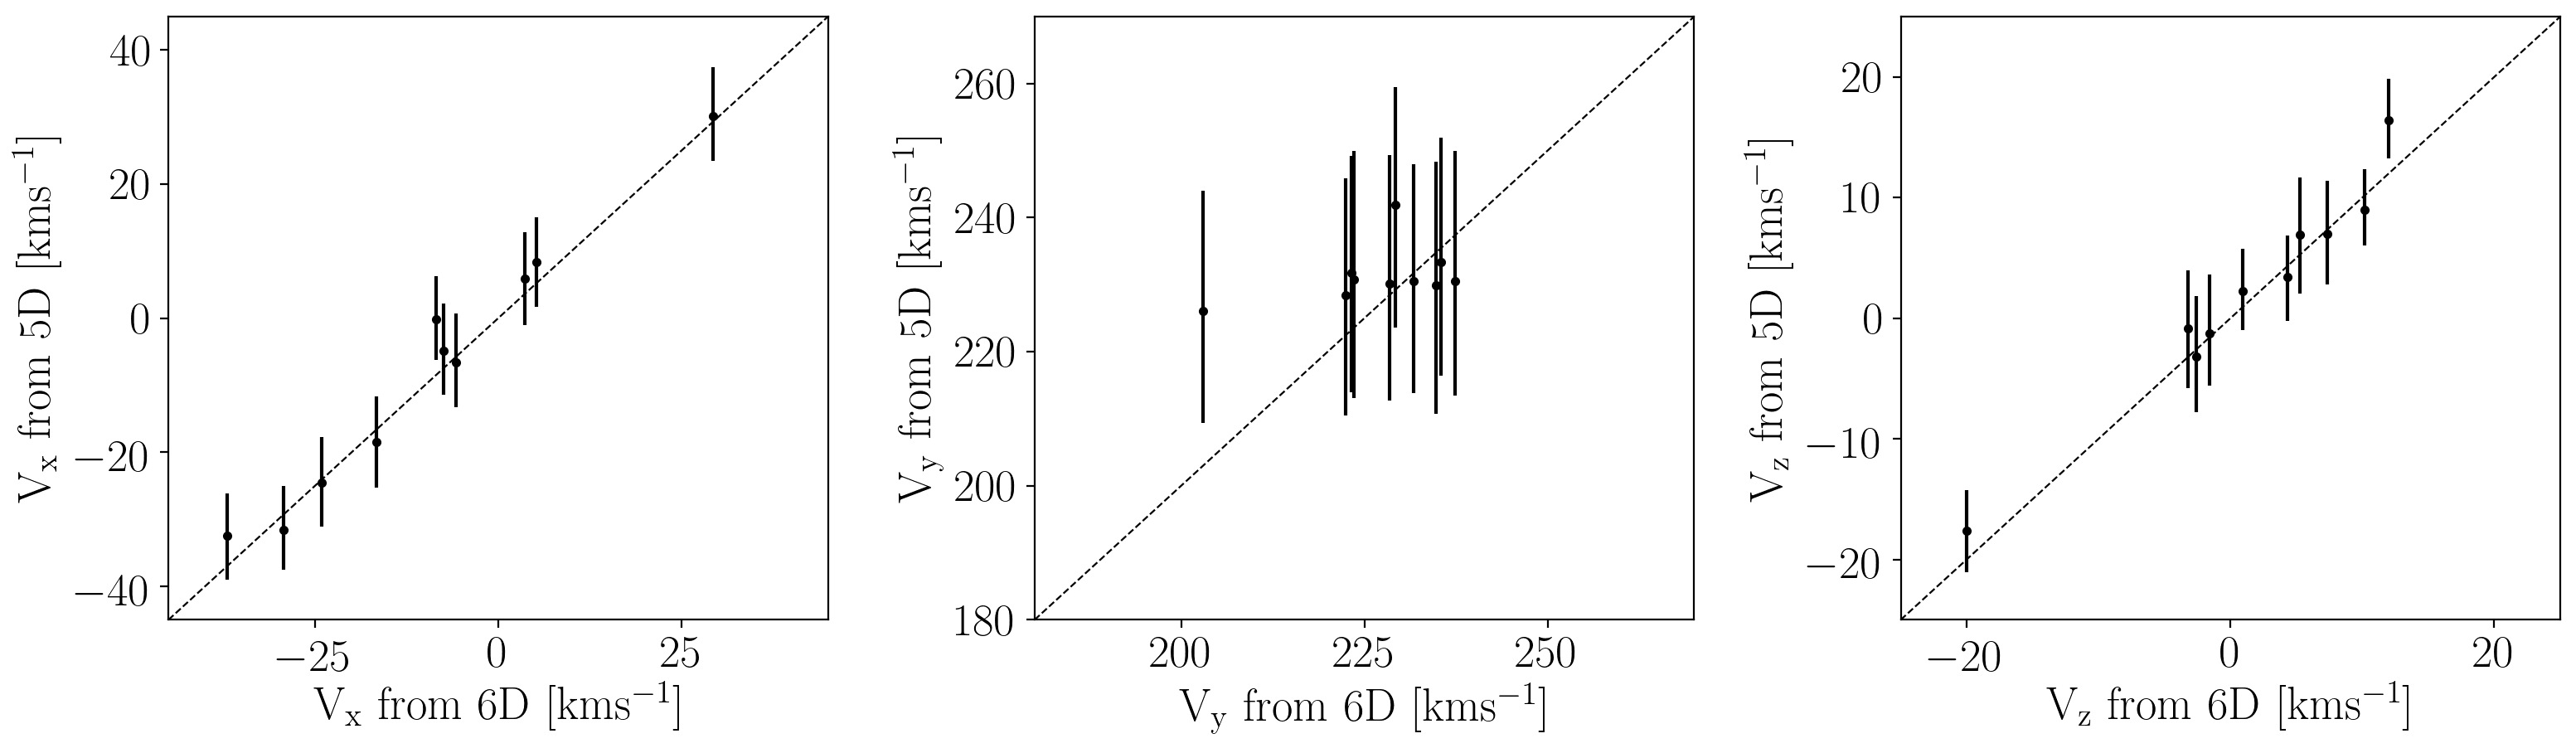

In [25]:
fig = plt.figure(figsize=(16, 5), dpi=200)

ax1 = fig.add_subplot(131)
minx, maxx = -45, 45
xs = np.linspace(minx, maxx, 100)
ax1.plot(xs, xs, ls="--", color="k", lw=.8, zorder=0)
ax1.errorbar(df.vx_true, df.vx_inferred,
             yerr=[df.vx_inferred_errm, df.vx_inferred_errp],
             fmt="k.", zorder=1, rasterized=True)
ax1.set_xlabel("$\mathrm{V_x~from~6D~[kms^{-1}]}$")
ax1.set_ylabel("$\mathrm{V_x~from~5D~[kms^{-1}]}$")
ax1.set_xlim(minx, maxx)
ax1.set_ylim(minx, maxx)

ax2 = fig.add_subplot(132)
miny, maxy = 180, 270
xs = np.linspace(miny, maxy, 100)
ax2.plot(xs, xs, ls="--", color="k", lw=.8, zorder=0)
ax2.errorbar(df.vy_true, df.vy_inferred,
             yerr=[df.vy_inferred_errm, df.vy_inferred_errp],
             fmt="k.", zorder=1, rasterized=True)
ax2.set_xlabel("$\mathrm{V_y~from~6D~[kms^{-1}]}$")
ax2.set_ylabel("$\mathrm{V_y~from~5D~[kms^{-1}]}$")
ax2.set_xlim(miny, maxy)
ax2.set_ylim(miny, maxy)

ax3 = fig.add_subplot(133)
minz, maxz = -25, 25
xs = np.linspace(minz, maxz, 100)
ax3.plot(xs, xs, ls="--", color="k", lw=.8, zorder=0)
ax3.errorbar(df.vz_true, df.vz_inferred,
             yerr=[df.vz_inferred_errm, df.vz_inferred_errp],
             fmt="k.", zorder=1, rasterized=True)
ax3.set_xlabel("$\mathrm{V_z~from~6D~[kms^{-1}]}$")
ax3.set_ylabel("$\mathrm{V_z~from~5D~[kms^{-1}]}$")
ax3.set_xlim(minz, maxz)
ax3.set_ylim(minz, maxz)


plt.tight_layout()
plt.savefig("../../paper/v_comparison.pdf")